### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

### Import data and set up axes

In [40]:
# Setting up axes
n_om = 100
om_min = .05
om_max = 1

n_s8 = 100
s8_min = 0.4
s8_max = 1.2

n_gamma = 100
gamma_min = -0.5
gamma_max = 2

omega_vals = np.asarray(np.linspace(om_min, om_max, n_om))
sigma_vals = np.asarray(np.linspace(s8_min, s8_max, n_s8))
gamma_vals = np.asarray(np.linspace(gamma_min, gamma_max, n_gamma))

# Importing data
data_rsd = np.load("../output/chi2_RSD/chi2_grids.npz")
data_panth = np.load("../output/chi2_SN1a/chi2_grids.npz")

chi2_grid1_rsd = data_rsd['grid1']
chi2_grid2_rsd = data_rsd['grid2']
chi2_grid3_rsd = data_rsd['grid3']

chi2_grid1_panth = data_panth['grid1']
chi2_grid2_panth = data_panth['grid2']
chi2_grid3_panth = data_panth['grid3']

chi2_grid1_act_dr6 = np.load("../output/chi2_lensing/chi2_grid1.npz")['grid1']
chi2_grid2_act_dr6 = np.load("../output/chi2_lensing/chi2_grid2.npz")['grid2']
chi2_grid3_act_dr6 = np.load("../output/chi2_lensing/chi2_grid3.npz")['grid3']

chi2_rsd = [chi2_grid1_rsd, chi2_grid2_rsd, chi2_grid3_rsd]
chi2_panth = [chi2_grid1_panth, chi2_grid2_panth, chi2_grid3_panth]
chi2_act_dr6 = [chi2_grid1_act_dr6, chi2_grid2_act_dr6, chi2_grid3_act_dr6]

chi2_grids_methods = [chi2_rsd, chi2_panth, chi2_act_dr6]

### Plot

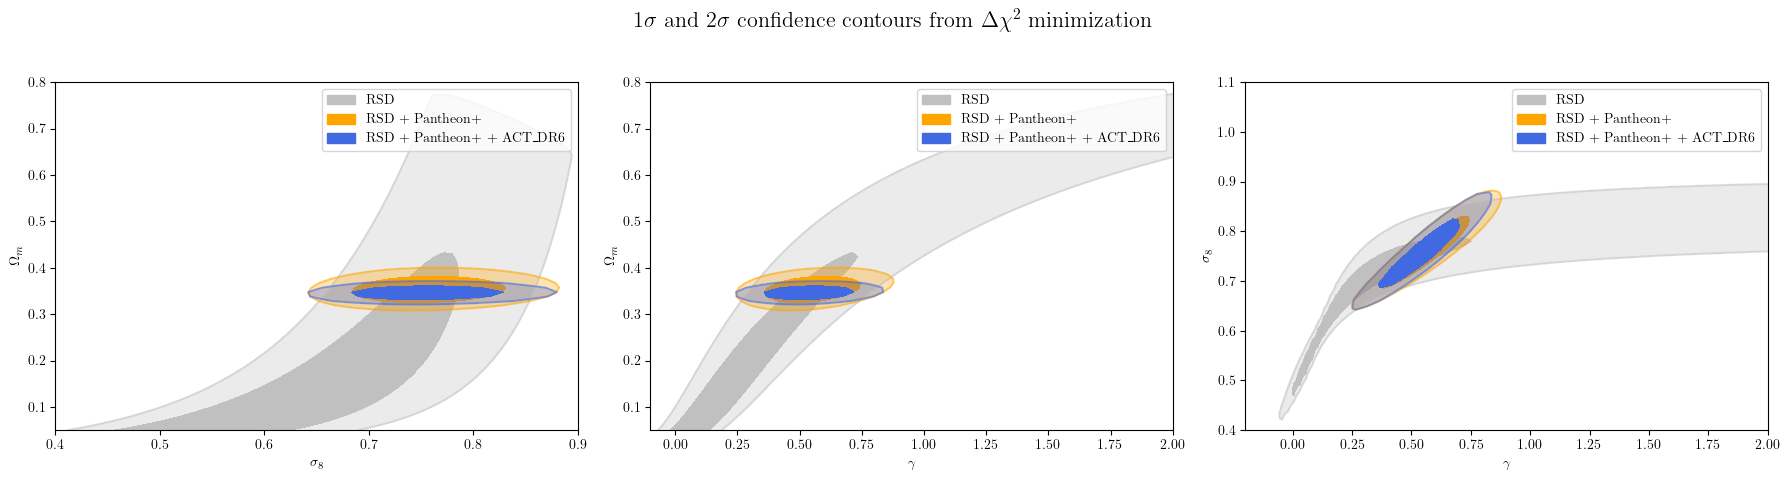

In [52]:
def display_all_chi2(chi2_grids_methods, axes):
    levels = [[0, 2.3], [2.3, 6.17], [6.17, 11.8]]
    alphas = [1.0, 0.3, 0]

    axes_titles = [
        (r'$\sigma_8$', r'$\Omega_m$', 0),
        (r'$\gamma$', r'$\Omega_m$', 1),
        (r'$\gamma$', r'$\sigma_8$', 2)
    ]

    methods = ['RSD', 'RSD + Pantheon+', 'RSD + Pantheon+ + ACT_DR6']

    colors_methods = ['silver', 'orange', 'royalblue']

    patchs = [Patch(color=colors_methods[0], label=methods[0]),
              Patch(color=colors_methods[1], label=methods[1]),
              Patch(color=colors_methods[2], label=methods[2])]

    for i_method in range(len(chi2_grids_methods)):
        chi2_grids = chi2_grids_methods[i_method]
        color = colors_methods[i_method]
        colors = 3 * [color]

        for ax, (xlabel, ylabel, axis) in zip(axes, axes_titles):
            chi2_grid = chi2_grids[axis]

            sigma_vals = np.asarray(np.linspace(s8_min, s8_max, chi2_grid.shape[0]))
            omega_vals = np.asarray(np.linspace(om_min, om_max, chi2_grid.shape[0]))
            gamma_vals = np.asarray(np.linspace(gamma_min, gamma_max, chi2_grid.shape[0]))

            if axis == 0:
                X, Y = np.meshgrid(sigma_vals, omega_vals)
            elif axis == 1:
                X, Y = np.meshgrid(gamma_vals, omega_vals)
            elif axis == 2:
                X, Y = np.meshgrid(gamma_vals, sigma_vals)

            chi2_min = np.min(chi2_grid)
            delta_chi2 = chi2_grid - chi2_min

            delta_chi2_clipped = np.clip(delta_chi2, a_min=None, a_max=11.8)
            
            for level_bornes, color, alpha in zip(levels, colors, alphas):
                cs = ax.contourf(X, Y, delta_chi2, levels=[level_bornes[0], level_bornes[1]], colors=[color], alpha=alpha)
                if alpha == 0.3:
                    cs = ax.contour(X, Y, delta_chi2, levels=[level_bornes[1]], colors=[color], alpha=0.5)
                
            ax.set_xlabel(axes_titles[axis][0])
            ax.set_ylabel(axes_titles[axis][1])

            if axis == 0:
                ax.set_xlim([0.4, 0.9])
                ax.set_ylim([0.05, 0.8])
            elif axis == 1:
                ax.set_xlim([-0.1, 2])
                ax.set_ylim([0.05, 0.8])
            elif axis == 2:
                ax.set_xlim([-.2, 2])
                ax.set_ylim([0.4, 1.1])

            ax.legend(handles=patchs, loc='upper right')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(r"1$\sigma$ and 2$\sigma$ confidence contours from $\Delta \chi^2$ minimization", fontsize=16)
display_all_chi2(chi2_grids_methods, axes)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.rcParams.update({
    "text.usetex": True
})
plt.show()